# ER

In [1]:
from SubTempNet import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#Create Temporal network
n = 100
p = 0.0001
t = 15000
name = "data/ER/ER_ud_n"+str(n)+"_p"+str(p)[2:]+"_T"+str(t) +".edges"
A = [nx.gnp_random_graph(n, p, seed=None, directed=False) for i in range(t)]
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(n),2,replace = False )
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(n),2,replace = False )
    A[-1].add_edge(u,v)
SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')

In [2]:
filepath ="data/ER/ER_ud_n100_p0001_T15000.edges"
objname = "ER_n100_p0001"
STN= SubTempNet(filepath,objname,directed= False, init = False)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 19, 22, 26, 31, 36, 42, 49, 57, 67, 79, 92, 108, 126, 147, 172, 201, 236, 275, 322, 377, 440, 515, 602, 704, 823, 962, 1124, 1314, 1536, 1796, 2099]


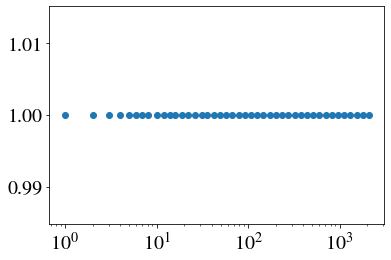

In [39]:
num = 50
T = sorted(list(set(np.logspace(np.log10(2100),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [40]:
STN.run(*T,  maxsamp = 50, minsamp = 10)

Done with samplelengths  [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 19, 22, 26, 31, 36, 42, 49, 57, 67, 79, 92, 108, 126, 147, 172, 201, 236, 275, 322, 377, 440, 515, 602, 704, 823, 962, 1124, 1314, 1536]
Analyzing sample number 10 for samplelength  1796 and  8 slices


In [43]:
STN.save()

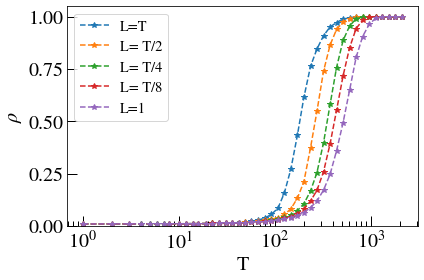

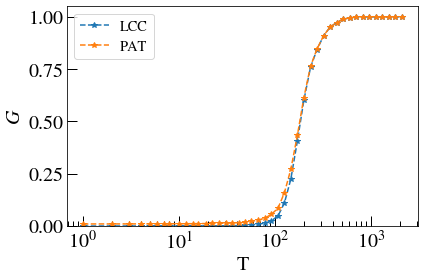

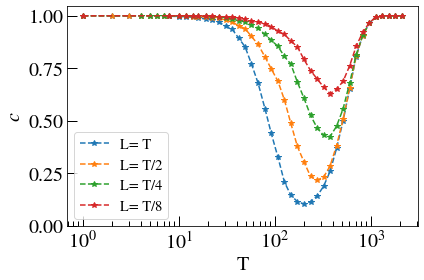

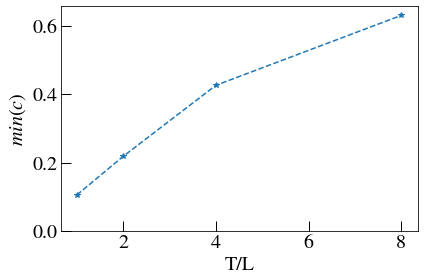

In [7]:
STN.plot_PA(normalize=True, LCC = False)
STN.plot_LCC(normalize=True, ACC = True)
STN.plot_cA0AT()
STN.plot_min()